## Dynamics of the COVID-19 infection
*Introduction and Summary: Thomas Murschall, Georg Wallmann*<br>
*Neher model: Georg Wallmann*<br>
*Colizza model: Thomas Murschall*
### 0. Setup and imports
Pre-requirements are:
* numpy
* scipy
* matplotlib
* PIL

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
from copy import deepcopy

### 1. Models for the simulation of the COVID-19 Pandemic

As the current Sars-CoV-2 Pandemic unfolds, research groups around the world try to model the dynamics of the ongoing Pandemic. Epediemiological models are needed to forecast the infections, guide policy makers and probe interventions measures. Even though multiple approaches have been implemented to elucidate different facets of the Pandemic, most models are based on the same SEIR [1] framework. The population of interest is seperated into different compartements, based on theil contact with the pathogen. Susceptible (S) People can become exposed (E), which can lead to an successfull infection with the virus. Infected (I) population can then further infect susceptible indivisuals until recovery (R). As described the SEIR model assumes immunity after overcomming the infection.

$
\newcommand{ptr}[1]{\overset{\mathtt{#1}}{\longrightarrow}}                                  
                                             \fbox{S(t)}  \ptr{exposition}
                                              \fbox{E(t)}    \ptr{infection}
                                              \fbox{I(t)}     \ptr{recovery}
                                             \fbox{R(t)}
$
<br><br>

##### The Neher Model - COVID-19 Dynamics
The research group from the Swiss Institute of Bioinformatics, led by Richard Neher, developed a model to simulate the current Sars-CoV-2 Pandemic [2]. The Model is based on the described SEIR  framework, which was extended to account for the specific questions of interest in the current Pandemic. A special focus was set to asses the strain on the healthcare system and to model the capacity overflow on ICU units. Furthermore, the effect on different age groups can be assessed and the isolation of age groups can be modeled with high fidelity. and the effect of seasonal forcing on the spread of infection can be simulated [3]. The model was published as an interactive web application which freely accessible and lets the user explore fitted parameters based on observational data and custom parameters [4]. 

##### The Colizza Model
Another group of researchers arround Laura Di Domenico from the INSERM [5] also created a model to describe the Sars-CoV-2 Pandemic. The base for the model is also a modified SEIR framework. It is extended to bring in the contacts between people and the different behaviours of infected perople into calculation.  
At the moment, europe and the world are currently under strict social distancing measures. It is not clear, how the different countries can reduce the strict counter measures against the virus, without running into a second wave.  
Therefor the paper addresses the question, what influence have the applied counter measures on the development of the pandemi and what are possible exit strategies to get out of the lockdown in a save way.  
The paper is published as a pre-print and publicly available [6]. It contains information about the model and the used parameter but does not publish the sources.

### 2. The Neher model, modeling the health system strain and ICU Overflow

The default SEIR model was extendend to assess the strain of the pandemic on the healthcare system. Therefore the clinical stages between infection and recovery or Death (D) were modeled explicitly. Infected patients can transition to be hospitalized (H) based on the severity of the disease and treatement in an intensive care unit can become necessary. Based on the number of free ICU beds, these patients will be transitioned to the group of critical (C) patients in ICU or can become part of an overflow (O) compartement with a lower probability of recovery. This allows to model the case of an ICU overflow, which is associated with a higher fatality rate. Forecasting this is highly relevant, as an ICU overflow and overwhelming strain on the healthcare system needs to be mitigated in order to combat the Pandemic [7]. 

All specified compartments are modeled on the level of individual age groups. Each of the age-groups as denoted by the index $a$ can have its own degree of isolation and probabilities to develope a critical stage of the disease. This is crucial in order to account for the varying severity of the disease based on the age [8]. Age specific compartements are implemented as age groups of ten Years $a=\{(0{\text -}9), (10{\text -}19), (20{\text -}29), (30{\text -}39), (40{\text -}49), (50{\text -}59), (60{\text -}69), (70{\text -}79), (80+)\}$.

$S_a(t)$ Susceptible people<br>
$E_{1a}(t), E_{2a}(t), E_{3a}(t)$ Incubation states between infection and infectiousnes<br>
$I_a(t)$ Infected individuals<br>
$R_a(t)$ Recovered patients<br>
$D_a(t)$ Fatalaties due to infection<br>


$H_a(t)$ Hospitalized patients<br>
$C_a(t)$ Critical patients in ICU<br>
$O_a(t)$ Critical patients which can't go to ICU because of ICU overflow<br>

$$
\begin{align*}
    \frac{dS_a(t)}{dt} &= -\beta S_a(t) N^{-1} \sum_{b} I_b(t) \\
    \frac{dE_{1a}(t)}{dt} &= \beta S_a(t) N^{-1} \sum_{b} I_b(t) - 3 E_{1a}(t) t_l^{-1}\\
    \frac{dE_{2a}(t)}{dt} &= 3 E_{1a}(t) t_l^{-1} - 3 E_{2a}(t) t_l^{-1}\\
    \frac{dE_{3a}(t)}{dt} &= 3 E_{2a}(t) t_l^{-1} - 3 E_{3a}(t) t_l^{-1}\\
    \frac{dI_a(t)}{dt} &= 3 E_3(t) t_l^{-1} - I_a(t) t_i^{-1} \\
    \frac{dH_a(t)}{dt} &= (1-m_a) I_a(t)t_i^{-1}  + (1-f_a)(C_a(t)+\xi O_a(t))t_c^{-1} - H_a(t)t_h^{-1}\\
    \frac{dC_a(t)}{dt} &= c_a \Theta(C_{ICU} - \sum_b C_b(t)) H_a(t)t_h^{-1} - C_a(t)t_c^{-1}\\
    \frac{dO_a(t)}{dt} &= c_a \Theta((\sum_b C_b(t))-C_{ICU}) H_a(t)t_h^{-1} - [1+(\xi -1)f_a]O_a t_c^{-1}\\
    \frac{dR_a(t)}{dt} &= m_a I_a(t) t_i^{-1} + (1-c_a)H_a(t)t_h^{-1} \\
    \frac{dD_a(t)}{dt} &= f_a (C_a(t)+\xi O_a(t))t_c^{-1}
\end{align*}
$$

$$
\Theta(x) = \frac{\tanh(x)+1}{2}
$$

### 2.2. Parameters of the model
The model is specified by a number of age specific and general paramters.<br>
Parameters for the transition times are age independend but could be extended to become age specific.<br>

$t_l$ Latency time between infection and infectiousness<br>
$t_i$ Average time between onset of sickness and recovery<br>
$t_h$ Average time of a hospital stay after admission<br>
$t_c$ Average time of ICU stay if the infection progresses with higher severity<br><br>

Parameters for the progression of the disease and isolation are age dependent<br>

$m_a$ The fraction of cases, which are asymptotic or mild<br>
$c_a$ The fraction of severe cases that turn critical<br>
$f_a$ The fraction of critical cases that end fatal<br>
$\zeta_{a}$ Degree of isolation of the specified group<br><br>
$\xi$ The mortality rate of an overflow patient relative to a patient with an ICU bed<br>
$C_{ICU}$ Number of ICU beds<br><br>


The rate of transmission $\beta_a(t)$ of the infection is an age and time dependent parameter. It describes the seasonal infection rate taking into account the seasonal forcing, isolation of the age group and interventions. An infectious Person transmits the virus to $\beta_a(t)t_i$ healthy persons on average over the course of the infection.<br>

$\beta_a(t) = R_0 \zeta_{a}(1+\epsilon \cos(2\pi(t-t_{max})/365))t_i^{-1}  \prod_{k}M_{k}(t)  $

$R_0$ Average number of transmissions during the course of infection<br><br>
$t_{max} $Time of maximum infectivity over the course of the year due to seasonal forcing<br>
$\epsilon$ Degree of seasonal forcing<br>
$M_{k}(t)$ Time dependend inteventions specifying the degree of reduction in infectivity<br><br>

$N$ Population size<br>

### 2.3. Implementation of the model

In [2]:
class Model:

    def __init__(self, population, agePar, par, cm):
        self.N = np.sum(population)
        self.population = population
        self.agePar = agePar
        self.par = par
        self.cm = cm
        
    def beta(self, t, R_0, zeta, cm):
        epsilon = self.par["seasonalForcing"]
        t_max = self.par["t_max"]
        t_i = self.par["t_i"]
        
        R = R_0 * (1-zeta) * (1+epsilon*np.cos(2*np.pi*(t-t_max)/365))
        
        if isinstance(t,np.ndarray):
            for m in cm:
                effect = np.where(np.logical_and(m[0] < t, m[1] > t))
                R[effect] *= (1 - m[2])
        
        else:
            for m in cm:
                R *= (1 - m[2]) if m[0] < t < m[1] else 1
                
        return R/t_i
    
    def plotR0(self):
        
        t = np.linspace(1,365,365)
        
        cm = []
        for m in self.cm:
            cm.append([m["time"][0],m["time"][1], m["reduction"][1]])
                
        R_0_l = self.beta(t,self.par["R0"][0],0, cm)*self.par["t_i"]
                       
                       
        cm = []
        for m in self.cm:
            cm.append([m["time"][0],m["time"][1], m["reduction"][0]])
                       
        R_0_u = self.beta(t,self.par["R0"][1],0, cm)*self.par["t_i"]
        
        plt.fill_between(t,R_0_l, R_0_u, alpha = 0.5)
        plt.ylim((0,max(R_0_u)+1))
        plt.plot([0,364],[1,1], "--", c="red")
        fig = plt.gcf()
        fig.set_size_inches(14, 4)
        plt.title("Transmission rate")
        plt.ylabel("R")
        plt.xticks([0, 28, 59, 89, 120, 150, 181, 211, 242, 272, 303, 333,364], 
                   ["January", 'February', "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], rotation=45)
        plt.show()
        
    def system(self,v,t,R0,cm):
        o = np.array([])
        v = np.reshape(v,(9,10))
        
        sumI = np.sum(v[:,4])
        sumC = np.sum(v[:,6])
            
        t_l = self.par["t_l"]
        t_i = self.par["t_i"]
        t_h = self.par["t_h"]
        t_c = self.par["t_c"]
        xi = self.par["overflowMortality"]
        maxC = self.par["ICU"]
        for i, age in enumerate(v):
            ageP = self.agePar[i]
            
            m_a = 1-ageP[1]
            c_a = 1-ageP[2]
            f_a = 1-ageP[3]
            
            b = self.beta(t,R0,0, cm)
            
            S, E1, E2, E3, I, H, C,O, R, D = age.tolist()
            
            dSdt = -b*S*sumI/self.N
            dE1dt = b*S*sumI/self.N - 3*E1/t_l
            dE2dt = 3*E1/t_l - 3*E2/t_l
            dE3dt = 3*E2/t_l - 3*E3/t_l
            dIdt = 3*E3/t_l - I/t_i
            dHdt = (1-m_a)*I/t_i + (1-f_a)*(C + xi* O)/t_c - H/t_h
            dOdt = c_a*(np.tanh(sumC-maxC)+1)*H/(2*t_h) - (1+(xi-1)*f_a)*O/t_c
            dCdt = c_a*(np.tanh(maxC-sumC)+1)*H/(2*t_h) - C/t_c
                
            dRdt = m_a*I/t_i + (1-c_a)*H/t_h
            dDdt = f_a*(C + xi* O)/t_c

            o = np.concatenate((o,[dSdt,dE1dt,dE2dt,dE3dt,dIdt,dHdt,dCdt,dOdt,dRdt,dDdt]))

        return o
    
    def setTime(self, time):
        self.time = time
    
    def simulate(self, stepsDay, samples):
        self.stepsDay = stepsDay
        p = np.expand_dims(self.population, axis=0).T
        v = np.zeros((9,9))   
        v0 = np.concatenate((p,v),axis=1)
        
        v0[:,4] = 1
        
        v0 = np.reshape(v0,(90))
        steps = (self.time[1]-self.time[0])*self.stepsDay
        t = np.linspace(self.time[0],self.time[1],steps)
        
        
        self.solutionSum = []
        self.solution = []
        
      
        
        for i in range(samples):
            R0 = np.random.uniform(low=self.par["R0"][1],high=self.par["R0"][1])
            
            cm = []
            for m in self.cm:
                cm.append([m["time"][0],m["time"][1], np.random.uniform(low=m["reduction"][0],high=m["reduction"][1])])
         
   
        
            sol = odeint(self.system, v0, t, args=(R0,cm,))
            solArr = np.reshape(sol,(steps,9,10))
            self.solution.append(solArr)
            self.solutionSum.append(np.sum(solArr,axis=1))
            
    def calcConfidence(self):
        
        steps = (self.time[1]-self.time[0])*self.stepsDay
        self.lower = []
        self.upper = []
        self.median = []
        for time in range(steps):
            la = []
            ua = []
            ma = []
            for age in range(len(self.solution[0][time])):
                lc = []
                uc = []
                mc = []
                for compartement in range(len(self.solution[0][time][age])):
                    choices = [s[time][age][compartement] for s in self.solution]
                    lower = np.quantile(choices, 0.2)
                    upper = np.quantile(choices, 0.8)
                    mc.append(np.median(choices))
                    lc.append(lower)
                    uc.append(upper)
                la.append(lc)
                ua.append(uc)
                ma.append(mc)
            self.lower.append(la)
            self.upper.append(ua)
            self.median.append(ma)
            
        self.lower = np.array(self.lower)
        self.upper = np.array(self.upper)
        self.median = np.array(self.median)
        
        self.lowerSum = np.sum(self.lower,axis=1)
        self.upperSum = np.sum(self.upper,axis=1)
        self.medianSum = np.sum(self.median,axis=1)
        
        
    def plot(self):
        solution = self.solutionSum[0]
        
        steps = (self.time[1]-self.time[0])*self.stepsDay
        t = np.linspace(self.time[0],self.time[1],steps)
        
        larger = np.where(solution < 1)
        solution[larger] = 0
        
        plt.fill_between(t, self.lowerSum[:,0],self.upperSum[:,0], color="lightblue", alpha = 0.3, label=r"Susceptible")
        plt.fill_between(t, self.lowerSum[:,4],self.upperSum[:,4], color="orange", alpha = 0.3, label=r"Infected")
        plt.fill_between(t, self.lowerSum[:,5],self.upperSum[:,5], color="indianred", alpha = 0.3, label=r"Hospitalized")
        plt.fill_between(t, self.lowerSum[:,6],self.upperSum[:,6], color="red", alpha = 0.3, label=r"ICU")
        plt.fill_between(t, self.lowerSum[:,7],self.upperSum[:,7], color="darkred", alpha = 0.3, label=r"Overflow")
        plt.fill_between(t, self.lowerSum[:,8],self.upperSum[:,8], color="green", alpha = 0.3, label=r"Recovered")
        plt.fill_between(t, self.lowerSum[:,9],self.upperSum[:,9], color="dimgrey", alpha = 0.3, label=r"Dead")
        

        plt.plot(t,self.medianSum[:,0], c="lightblue")
        plt.plot(t,self.medianSum[:,4], c="orange")
        plt.plot(t,self.medianSum[:,5],  c="indianred")
        plt.plot(t,self.medianSum[:,6],  c="red")
        plt.plot(t,self.medianSum[:,7],  c="darkred")
        plt.plot(t,self.medianSum[:,8],  c="green")
        plt.plot(t,self.medianSum[:,9],  c="dimgrey")
        
        plt.title("Cumulative compartements")
        plt.xlabel("t in days")
        plt.ylabel("No. of people")
        plt.legend(loc=2)
        fig = plt.gcf()
        plt.yscale("log")
        plt.ylim(bottom=1)
        fig.set_size_inches(14, 10)
        plt.xticks([28, 59, 89, 120, 150, 181, 211, 242, 272, 303, 333, 364], 
                   ['February', "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], rotation=45)
        plt.show()
        
    def plotAgeGroups(self):
        ageGroups = np.arange(0,9)
        
        maxu = np.amax(self.upper,axis=0)
        maxl = np.amax(self.lower,axis=0)
        
        solution = np.array(self.median)
        maxc = np.amax(solution,axis=0)
        lastStep = np.array(solution[-1])
        
        ax = plt.gca()
        hospital = maxc[:,5]
        ierr = np.stack([maxu[:,5]-hospital,hospital-maxl[:,5]])
        ax.bar(ageGroups-0.15,  hospital, color="indianred", alpha = 0.3, width=0.15, yerr=ierr,label=r"Peak Hospitalized", error_kw=dict(capsize=3, ecolor="indianred"))
        
        ICU = maxc[:,6]
        icerr = np.stack([maxu[:,6]-ICU,ICU-maxl[:,6]])
        ax.bar(ageGroups, ICU,color="red", alpha = 0.3, width=0.15, label=r"Peak ICU", yerr=icerr, error_kw=dict(capsize=3, ecolor="red"))
        
        Overflow = maxc[:,7]
        oerr = np.stack([maxu[:,7]-Overflow,Overflow-maxl[:,7]])
        ax.bar(ageGroups+0.15, Overflow,color="darkred", alpha = 0.3, width=0.15, label=r"Peak Overflow", yerr=oerr, error_kw=dict(capsize=3, ecolor="darkred"))
        
        dead = maxc[:,-1]
        derr = np.stack([maxu[:,-1]-dead,dead-maxl[:,-1]])
        ax.bar(ageGroups+0.3, dead,color="dimgrey", alpha = 0.3, width=0.15, label=r"Dead", yerr=derr,error_kw=dict(capsize=3, ecolor="dimgrey", lolims=False))
        plt.legend(loc=2)
        ax.set_ylabel("No. of people")
        ax2 = ax.twinx()
        ax2.set_ylabel("% of population")
        affected = 100*(self.population)/self.N
        
        ax2.bar(ageGroups-0.3, affected,color="dimgrey", width=0.15, label=r"% of population")
        
        ax2.legend(loc=0)
        fig = plt.gcf()
        fig.set_size_inches(14, 6)
        
        plt.title("Maximum compartement population by age")
        plt.xticks(ageGroups, 
                   ['0-9', "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"], rotation=45)

### 2.4 Results from the Neher model
To run the Neher model one has to define a population and the age dependent and independent parameters. Additionally, interventions can be specified. <br>
This yields a confidence interval of transmission rate for a given timepoint, as seen in the first figure.
Based on this, the system is simulated with random parameters from the confidence intervals. Multiple simulations are performed and an 80% confidence interval as well as the median is calculated. This forecast of pandemic the can give insights into the effectiveness of interventions or can be used to tune transmission parameters from fittings.<br>

Due to the fine grained age groups, the burden for every age group can be estimated and the need for general hospital and ICU beds can be forecasted.

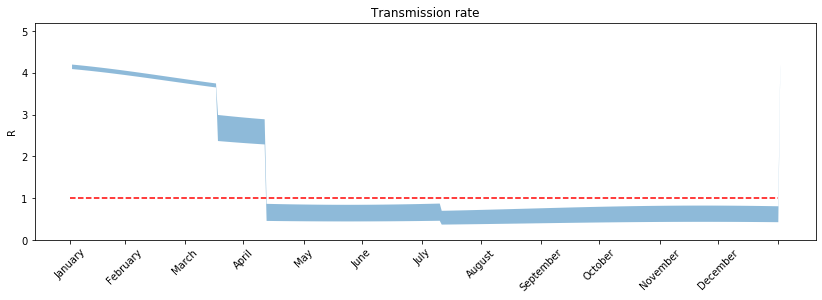

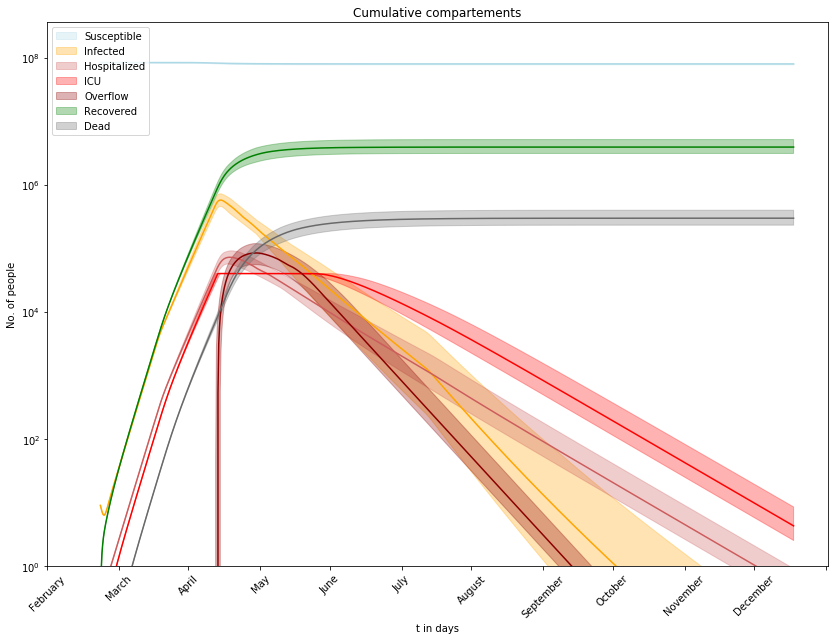

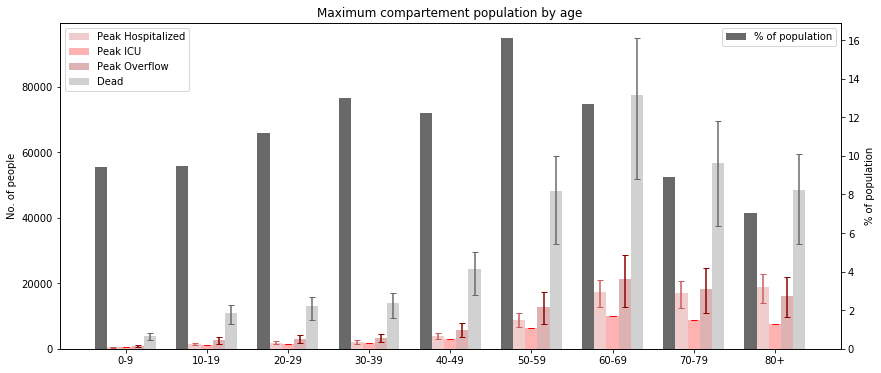

In [3]:
germanPopulation = np.array([
    7880902,
    7930616,
    9377359,
    10872019,
    10243351,
    13488393,
    10644140,
    7471414,
    5875748])

ageParameters = np.array([
    [0.05, 0.01, 0.05, 0.30, 0.0],
    [0.05, 0.03, 0.10, 0.30, 0.0],
    [0.10, 0.03, 0.10, 0.30, 0.0],
    [0.15, 0.03, 0.15, 0.30, 0.0],
    [0.20, 0.06, 0.20, 0.30, 0.0],
    [0.25, 0.10, 0.25, 0.40, 0.0],
    [0.30, 0.25, 0.35, 0.40, 0.0],
    [0.40, 0.35, 0.45, 0.50, 0.0],
    [0.50, 0.50, 0.55, 0.50, 0.0]
])

interventions = [
    {"time": [75,365],
         "reduction": [0.2,0.35]},
     {"time": [100,365],
         "reduction": [0.7,0.8]},
    {"time": [190,365],
             "reduction": [0.2,0.2]}]

parameters = {
   "seasonalForcing" : 0.10,
    "t_max": 325,
    "R0" : [3.8,3.9],
    "t_l": 3,
    "t_i": 3,
    "t_h": 3,
    "t_c": 14,
    "ICU": 40000,
    "overflowMortality": 1.5
}

model = Model(germanPopulation, ageParameters, parameters, interventions)
model.plotR0()
model.setTime([51,350])
#timesteps per day = 3, simulation runs = 5
model.simulate(3,20)
model.calcConfidence()
model.plot()
model.plotAgeGroups()


### 3. The Colizza Model, simulating contact behaviour

The model expandet SEIR model and includes multiple states infection states ($I$).
The state is split into the prodromic phase ($I_p$), followed by four states, repersenting the severity of  Asymptomatic Infectious state ($I_{a}$), Paucysymptomatic Infectious($I_{ps}$), Symptomatic Infectious ($I_{ms}$) and the state for Symptomatic Infectious with severe symptoms ($I_{ss}$).  
The first three states show a mild course after infection. The different states are used to model the behaviour of affected people in more detail. With the parameters it is possible to represent the selfisolation because of the illness. It is assumed that, during a sever illness, people reduce their contacts by 75% [10].  
All people in state $I_{ss}$ have a stay in the hospital, either in the normal tracks or in the ICU.  
These last two states help to analyse, if a counter measure is enough to prevent the health care system from collapsing.  
The compartmental model was initialy build based on French hospital data APHP (Assistance publique - Hôpitaux de Paris[11]).
Afterwards it was rescaled to fit whole Île-de-France region.  
The paper separates the population into three groups, children (c), adults (a) and seniors(s). Each group interacts with the others, but has a different contact level.


The general model is shown in Figure 1:



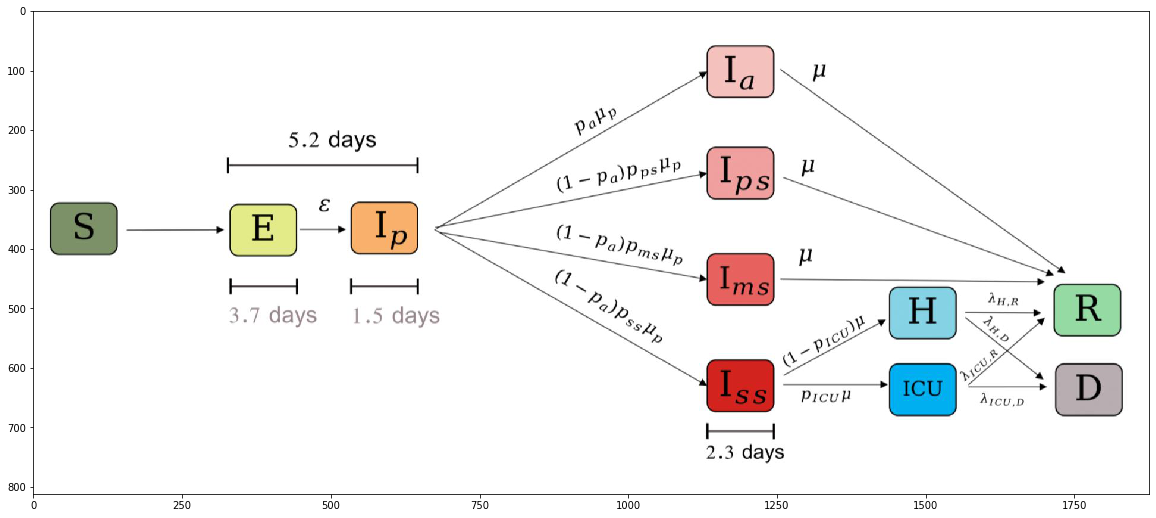

In [4]:
# Figure 1
%matplotlib inline
pil_im = Image.open('./modelGraph.JPG', 'r')
plt.rcParams['figure.figsize'] = (20,25)
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1) 
ax1.imshow(np.asarray(pil_im))

It can be described as a system of first order ordinary differential equations:

$$
\begin{align*}
    \frac{dS}{dt} &= -b * S *(I_{p} + I_{a} + I_{ps} + I_{ms} + I_{ss})\\
    \frac{dE}{dt} &=b * S * (I_{p} + I_{a} + I_{ps} + I_{ms} + I_{ss}) -e * E\\
    \frac{dI_{p}}{dt} &=e*E - u_{p} * I_{p}\\
    \frac{dI_{a}}{dt} &=p_{a}*u_{p}*I_{p} - u * I_{a}\\
    \frac{dI_{ps}}{dt} &=(1-p_{a}) * p_{ps} * u_{p} * I_{p} - u * I_{ps}\\
    \frac{dI_{ms}}{dt} &=(1-p_{a})* p_{ms} * u_{p} * I_{p} - u * I_{ms}\\
    \frac{dI_{ss}}{dt} &=(1-p_{a})* p_{ss} * u_{p} * I_{p} - u * I_{ss}\\
    \frac{dH}{dt} &=(1 - p_{ICU}) * u * I_{ss} - (\lambda_{H,R} + \lambda_{H,D}) * H\\
    \frac{dI_{ICU}}{dt} &=p_{ICU} * u * I_{ss} - (\lambda_{ICU,R} + \lambda_{ICU,D}) * ICU\\
    \frac{dR}{dt} &=u * (I_{a} + I_{ps} + I_{ms}) + l_{H,R} * H + l_{ICU,R} * ICU \\
    \frac{dD}{dt} &=l_{H,D} * H + l_{ICU,D} * ICU
\end{align*}
$$

To get a better understanding of the ODE system the different  population groups were not included in this table. In the implementation all three classes are used.

#### 3.1 Creating the contact matrix

The main contact matrix influencing the model is based on multiple contact matrices. Each matrix represents a given situation of the daily life and has its own amount of contacts between the different groups.  
The researchers devided the daily life in six different parts, each with a different ratio. As a result, we have six matrices: $K_{household}$, $K_{school}$, $K_{workplace}$, $K_{transport}$, $K_{leisure}$ and $K_{other}$.


To get our input matrix $K$ for the model, we can use the weighted sum of all matrices:
$$K=\sum{K_{place}*ratio_{place}}$$

To show the importance of this contact matrices, we created one baseline matrix $K_{baseline}$ and one matrix to decribe the influence of the counter measures $K_{measure}$.

The contact matrix is organized that $K_{00}$ represents the contacts from children to children, $K_{01}$ from adults to children and so on.
$$K=
\begin{pmatrix}
    c\rightarrow c && a\rightarrow c && s\rightarrow c\\
    c\rightarrow a && a\rightarrow a && s\rightarrow a\\
    c\rightarrow s && a\rightarrow s && s\rightarrow s
\end{pmatrix}
$$

[[6.999999999999999, 4.999999999999999, 3.9999999999999996], [1.2, 6.999999999999998, 1.9999999999999998], [0.7999999999999999, 6.0, 1.9999999999999998]]
[[6.916666666666666, 4.333333333333333, 3.4666666666666663], [1.0833333333333333, 6.999999999999998, 1.9999999999999998], [0.7, 6.0, 1.9999999999999998]]


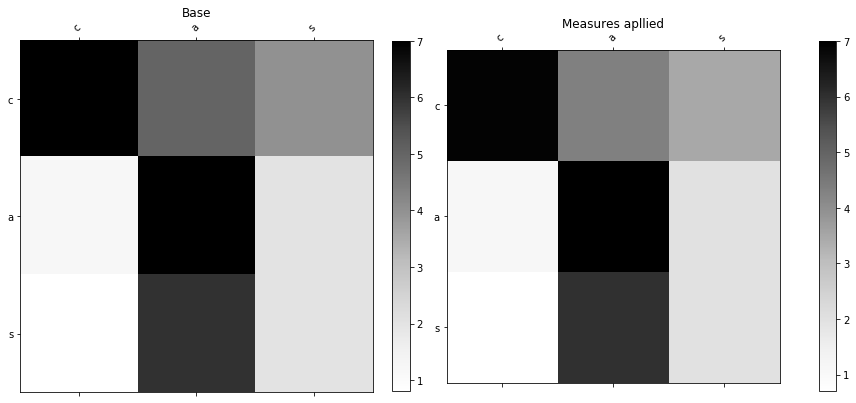

In [5]:
# baseline
ratioBase_household = 1/6
ratioBase_school = 1/6
ratioBase_workplace = 1/6
ratioBase_transport = 1/6
ratioBase_leisure = 1/6
ratioBase_other = 1/6

kBase_household = [
    [8, 5, 4],  
    [1.2, 7, 2], 
    [0.8, 6, 2]]
kBase_school = [
    [9, 5, 4], 
    [1.2, 7, 2], 
    [0.8, 6, 2]] 
kBase_workplace = [
    [1, 5, 4], 
    [1.2, 7, 2], 
    [0.8, 6, 2]] 
kBase_transport = [
    [8, 5, 4], 
    [1.2, 7, 2],
    [0.8, 6, 2]]
kBase_leisure = [
    [8, 5, 4],
    [1.2, 7, 2], 
    [0.8, 6, 2]] 
kBase_other = [
    [8, 5, 4], 
    [1.2, 7, 2], 
    [0.8, 6, 2]] 

kBase = [
    [1, 1, 1], 
    [1, 1, 1], 
    [1, 1, 1]] 

# Measure
# counter measure: school closing
# -> Impact on school and transport
ratioMeasure_household = 1/6
ratioMeasure_school = 0 
ratioMeasure_workplace = 1/6
ratioMeasure_transport = 1/6
ratioMeasure_leisure = 1/6
ratioMeasure_other = 1/6

kMeasure_household = [
    [8, 5, 4],  
    [1.2, 7, 2], 
    [0.8, 6, 2]]
kMeasure_school = [
    [8, 5, 4], 
    [1.2, 7, 2], 
    [0.8, 6, 2]] 
kMeasure_workplace = [
    [8, 5, 4], 
    [1.2, 7, 2], 
    [0.8, 6, 2]] 
kMeasure_transport = [
    [1.5, 1, 0.8], 
    [0.5, 7, 2],
    [0.2, 6, 2]]
kMeasure_leisure = [
    [8, 5, 4],
    [1.2, 7, 2], 
    [0.8, 6, 2]] 
kMeasure_other = [
    [8, 5, 4], 
    [1.2, 7, 2], 
    [0.8, 6, 2]] 

kMeasure = [
    [1, 1, 1], 
    [1, 1, 1], 
    [1, 1, 1]] 

for i in range(3):
    for j in range(3):
        kBase[i][j] = kBase_household[i][j] * ratioBase_household + kBase_school[i][j] * ratioBase_school \
                      + kBase_workplace[i][j] * ratioBase_workplace + kBase_transport[i][j] * ratioBase_transport \
                      + kBase_leisure[i][j] * ratioBase_leisure + kBase_other[i][j] * ratioBase_other
        
        kMeasure[i][j] = kMeasure_household[i][j] * ratioMeasure_household \
                         + kMeasure_school[i][j] * ratioMeasure_household \
                         + kMeasure_workplace[i][j] * ratioMeasure_workplace \
                         + kMeasure_transport[i][j] * ratioMeasure_transport \
                         + kMeasure_leisure[i][j] * ratioMeasure_leisure \
                         + kMeasure_other[i][j] * ratioMeasure_other
                
print (kBase)
print (kMeasure)
# Variation of [9]
# Basic Configuration
fig, axes = plt.subplots(ncols=2, figsize=(12, 12))
ax1, ax2 = axes

# Heat maps.
im1 = ax1.matshow(kBase, cmap='Greys')
im2 = ax2.matshow(kMeasure, cmap='Greys')

# Formatting for heat map 1.
ax1.set_title("Base")
ax1.set_xticks(range(len(kBase)))
ax1.set_yticks(range(len(kBase)))
ax1.set_xticklabels(['c', 'a', 's'])
ax1.set_yticklabels(['c', 'a', 's'])
ax1.set_ylim(len(kBase)-0.5, -0.5)
plt.setp(ax1.get_xticklabels(), rotation=45, ha='left', rotation_mode='anchor')
plt.colorbar(im1, fraction=0.045, pad=0.05, ax=ax1)

# Formatting for heat map 2.
ax2.set_title("Measures apllied")
ax2.set_xticks(range(len(kMeasure)))
ax2.set_yticks(range(len(kMeasure)))
ax2.set_xticklabels(['c', 'a', 's'])
ax2.set_yticklabels(['c', 'a', 's'])
ax2.set_ylim(len(kMeasure)-0.5, -0.5)
plt.setp(ax2.get_xticklabels(), rotation=45, ha='left', rotation_mode='anchor')
plt.colorbar(im2, fraction=0.045, pad=0.1, ax=ax2)

fig.tight_layout()
plt.show()

####  3.2 Parameters for the model

The parameters to feed in the model are mainly described in  the apendix of [6], Table S1.
One source for our parameters are the duration of of the different phases of the illnes:

$\Theta=\frac{1}{5.2}$  
$\mu_p=\frac{1}{1.5}$  
$\mu=7.5-\frac{1}{\Theta}$  
$\epsilon=\frac{1}{\Theta-\mu_p}$

To set the chances for severity of the infection we can just check the values from [6].

Even if there were lots of values for our parameters, it was not possible to fill all of them based on different scientific papers. As an example the values for $p_a$ are not clear. Also $r_\beta$, the relative infectiousnes is only defined for $I_p$, $I_a$ and $I_ps$ and seems extremly high (0.51).  
Because of the lack of time we could not verify these numbers in [12].

In [6]:
total = 12210000
ill = 500
status0=[total*0.26, total*0.29, total*0.15, ill*0.26, ill*0.29, ill*0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
t = np.linspace(0,120, 150)

e = (1/3.7, 1/3.7, 1/3.7)
p_a = (0.5, 0.2, 0.1)
p_ps = (1, 0.2, 0.2)
p_ms = (0, 0.7, 0.6)
p_ss = (0, 0.1, 0.2) 
u_p = (1/1.5, 1/1.5, 1/1.5)
u = (1/2.3, 1/2.3, 1/2.3)
p_icu = (0, 0.36, 0.2)
l_hr = (0, 0.36, 0.2)
l_hd = (0, 0.072 , 0.022)
l_icur = (0, 0.05, 0.036)
l_icud = (0, 0.0074, 0.029)

# Calculate infection rate
# relative infectivenes (0.51) vs reduced for ss, they reduce contact by 75%
attackRate = (0.1, 0.01, 0.01)
b = (attackRate[0]/status0[0], attackRate[1]/status0[1], attackRate[2]/status0[2])

# Isolation of groups -> Ia, Ips, Ims, Iss
# Self isolation of people with sever symptoms (reduces contact by 75%)
g_i = [1, 1, 1, 0.25]

#### 3.3 Implementing the Colizza model

One important part of the model is the separation of the population in three parts (c, a, s). We have different chances in the different groups for the infection rate and the progression.  
To represent this we created one model per group. The only contact between these three models is the infection phase. Children can not only infect other children, but also adults and seniors.

Using a solver for our function *colizzaModel(...)*, we calculate the development of all three population groups.

In [7]:
def casModel1(status, t, b, k, g_i, e, p_a, p_ps, p_ms, p_ss, u_p, u, p_icu, l_hr, l_hd, l_icur, l_icud):
    # re-create vectors per population group
    S = np.empty(3, dtype=float)
    E = np.empty(3, dtype=float)
    I_p = np.empty(3, dtype=float)
    I_a = np.empty(3, dtype=float)
    I_ps = np.empty(3, dtype=float)
    I_ms = np.empty(3, dtype=float)
    I_ss = np.empty(3, dtype=float)
    H = np.empty(3, dtype=float)
    ICU = np.empty(3, dtype=float)
    R = np.empty(3, dtype=float)
    D = np.empty(3, dtype=float)
    
    for i in range(3):
        S[i] = status[0 + i]
        E[i] = status[3 + i]
        I_p[i] = status[6 + i]
        I_a[i] = status[9 + i]
        I_ps[i] = status[12 + i]
        I_ms[i] = status[15 + i]
        I_ss[i] = status[18 + i]
        H[i] = status[21 + i]
        ICU[i] = status[24 + i]
        R[i] = status[27 + i]
        D[i] =status[ 30 + i]
    
    #prepare return arrays
    dSdT = np.empty(3, dtype=float)
    dEdT = np.empty(3, dtype=float)
    dI_pdT = np.empty(3, dtype=float)
    dI_adT = np.empty(3, dtype=float)
    dI_psdT = np.empty(3, dtype=float)
    dI_msdT = np.empty(3, dtype=float)
    dI_ssdT = np.empty(3, dtype=float)
    dHdT = np.empty(3, dtype=float)
    dICUdT = np.empty(3, dtype=float)
    dRdT = np.empty(3, dtype=float)
    dDdT = np.empty(3, dtype=float)
    
    # Define ODE system
    for i in range(3):     
        dSdT[i] = -b[i] * S[i] * (k[0][i] * (I_p[0] + g_i[0] * I_a[0] + g_i[1] * I_ps[0] + g_i[2] * I_ms[0] + g_i[3] * I_ss[0] ) \
                                  + k[1][i] * (I_p[1] + g_i[0] * I_a[1] + g_i[1] * I_ps[1] + g_i[2] * I_ms[1] + g_i[3] * I_ss[1] ) \
                                  + k[2][i] * (I_p[2] + g_i[0] * I_a[2] + g_i[1] * I_ps[2] + g_i[2] * I_ms[2] + g_i[3] * I_ss[2] ))
        dEdT[i] = - e[i] * E[i] \
                  + b[i] * S[i] * (k[0][i] * (I_p[0] + g_i[0] * I_a[0] + g_i[1] * I_ps[0] + g_i[2] * I_ms[0] + g_i[3] * I_ss[0] ) \
                                 + k[1][i] * (I_p[1] + g_i[0] * I_a[1] + g_i[1] * I_ps[1] + g_i[2] * I_ms[1] + g_i[3] * I_ss[1] ) \
                                 + k[2][i] * (I_p[2] + g_i[0] * I_a[2] + g_i[1] * I_ps[2] + g_i[2] * I_ms[2] + g_i[3] * I_ss[2] )) \
                
        
        dI_pdT[i] = e[i] * E[i] - u_p[i]* (p_a[i]  + (1 - p_a[i]) * (p_ps[i] + p_ms[i] + p_ss[i])) * I_p[i] 
        dI_adT[i] = p_a[i] * u_p[i] * I_p[i] - u[i] * I_a[i]
        dI_psdT[i] = (1 - p_a[i]) * p_ps[i] * u_p[i] * I_p[i] - u[i] * I_ps[i]
        dI_msdT[i] = (1 - p_a[i]) * p_ms[i] * u_p[i] * I_p[i] - u[i] * I_ms[i]
        dI_ssdT[i] = (1 - p_a[i]) * p_ss[i] * u_p[i] * I_p[i] - u[i] * I_ss[i]    
        dHdT[i] = (1 - p_icu[i]) * u[i] * I_ss[i] - (l_hr[i] + l_hd[i]) * H[i]
        dICUdT[i] = p_icu[i] * u[i] * I_ss[i] - (l_icur[i] + l_icud[i]) * ICU[i]   
        dRdT[i] = u[i] * (I_a[i] + I_ps[i] + I_ms[i]) + l_hr[i] * H[i] + l_icur[i] * ICU[i] 
        dDdT[i] = l_hd[i] * H[i] + l_icud[i] * ICU[i]
    
    # return flattened arrays
    return [dSdT[0], dSdT[1], dSdT[2], dEdT[0], dEdT[1], dEdT[2], dI_pdT[0], dI_pdT[1], dI_pdT[2], dI_adT[0], dI_adT[1], dI_adT[2], dI_psdT[0], dI_psdT[1], dI_psdT[2], dI_msdT[0], dI_msdT[1], dI_msdT[2], dI_ssdT[0], dI_ssdT[1], dI_ssdT[2], dHdT[0], dHdT[1], dHdT[2], dICUdT[0], dICUdT[1], dICUdT[2], dRdT[0], dRdT[1], dRdT[2], dDdT[0], dDdT[1], dDdT[2] ]

### 3.4 Results from the Colizza model

The results of our simulation can be plottet in many different ways. Depending on what is needed for a deeper analyse, we can specify single individual plots for the states of interest.  
To show the impact of the contacts and that counter measures will help, we just plotted the baseline and the results with counter measures among each other.

We can see that only applying one counter measure (school closure) already impacts our curve. One of our problems was the missing initial configuration of the different places and its contact matrices. The chosen configuration gave every place the same impact and the same contact matrix. In reality, school closure could have a way bigger impact on the total situation. Nevertheless we could show that the principal of the model is working quite well.

The authors of the paper have used their model to simulate multiple measures and exit strategies. These results were not reproduced, but we could show that the model works quite well and could simulate different scenarios.

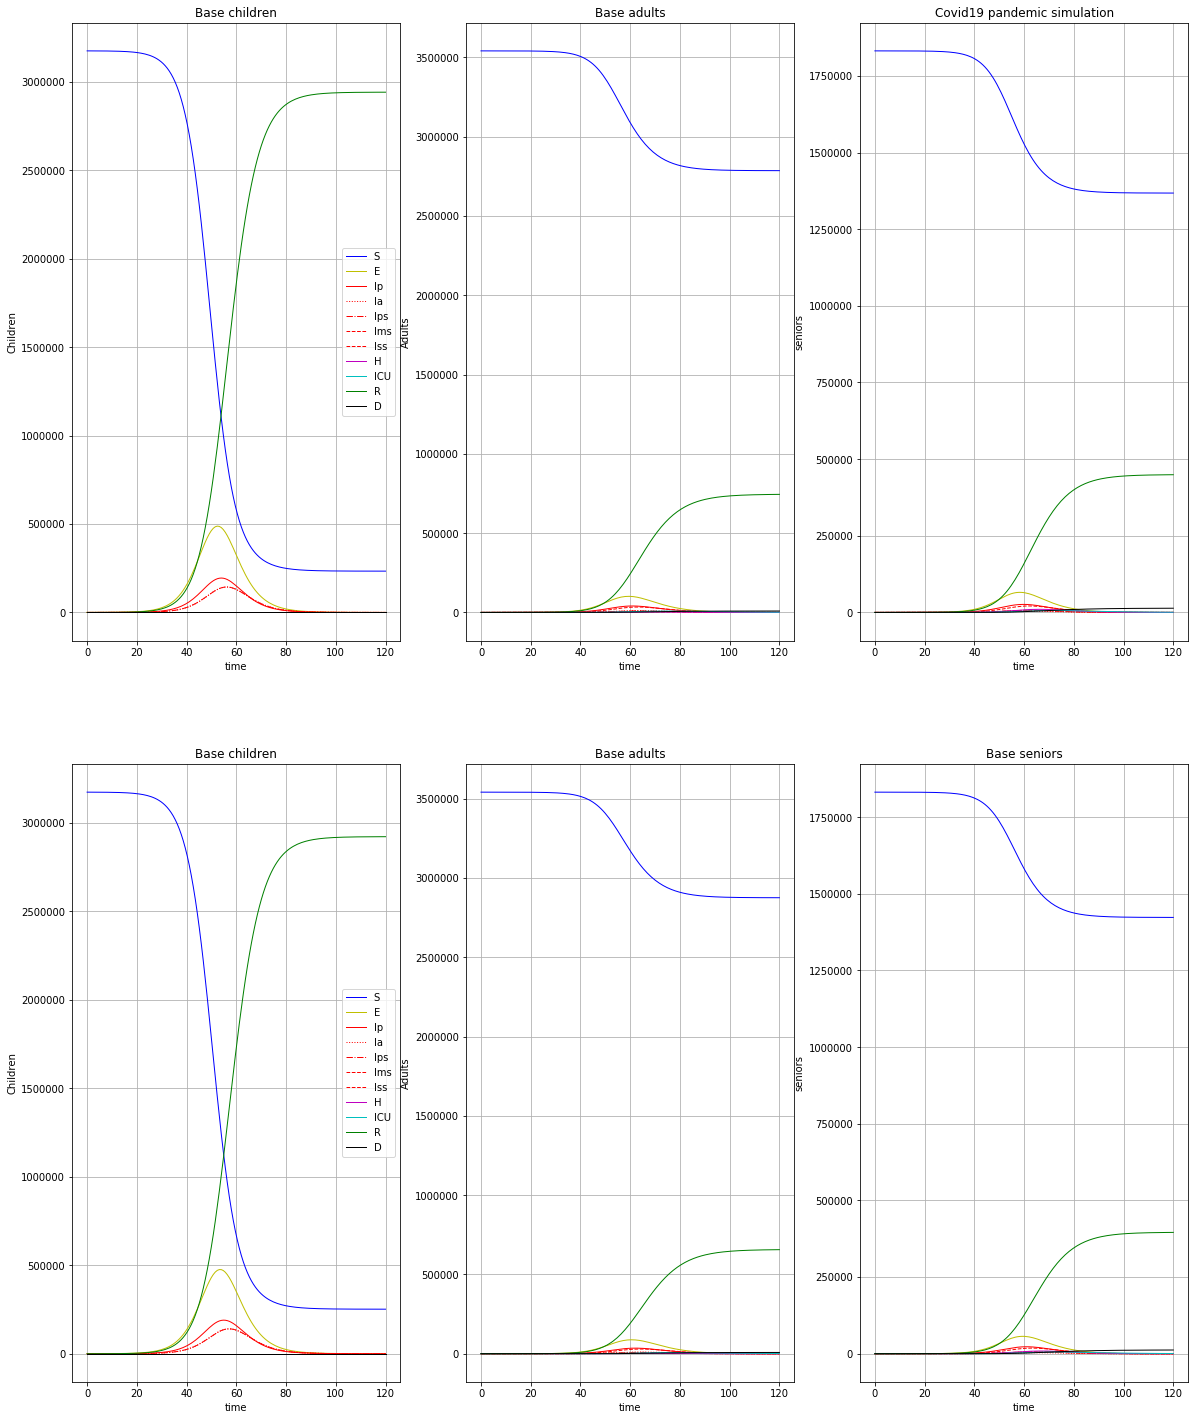

In [8]:
# Calculate results
resBase = odeint(casModel1,status0,t,args=(b, kBase, g_i, e, p_a, p_ps, p_ms, p_ss, u_p, u, p_icu, l_hr, l_hd, l_icur, l_icud))
resMeasure = odeint(casModel1,status0,t,args=(b, kMeasure, g_i, e, p_a, p_ps, p_ms, p_ss, u_p, u, p_icu, l_hr, l_hd, l_icur, l_icud))


# Whole data by group

# Children
step = 0
plt.subplot(2, 3, 1)
plt.title('Base children')
plt.plot(t,resBase[:,0 + step], 'b-', linewidth=1, label='S')
plt.plot(t,resBase[:,3 + step], 'y-', linewidth=1, label='E')
plt.plot(t,resBase[:,6 + step], 'r-', linewidth=1, label='Ip')
plt.plot(t,resBase[:,9 + step], 'r:', linewidth=1, label='Ia')
plt.plot(t,resBase[:,12 + step], 'r-.', linewidth=1, label='Ips')
plt.plot(t,resBase[:,15 + step], 'r--', linewidth=1, label='Ims')
plt.plot(t,resBase[:,18 + step], 'r--', linewidth=1, label='Iss')
plt.plot(t,resBase[:,21 + step], 'm-', linewidth=1, label='H')
plt.plot(t,resBase[:,24 + step], 'c-', linewidth=1, label='ICU')
plt.plot(t,resBase[:,27 + step], 'g-', linewidth=1, label='R')
plt.plot(t,resBase[:,30 + step], 'k-', linewidth=1, label='D')
plt.xlabel('time')
plt.ylabel('Children')
plt.grid()
plt.legend(loc='best')

# Adults
step = 1
plt.subplot(2, 3, 2)
plt.title('Base adults')
plt.plot(t,resBase[:,0 + step], 'b-', linewidth=1, label='S')
plt.plot(t,resBase[:,3 + step], 'y-', linewidth=1, label='E')
plt.plot(t,resBase[:,6 + step], 'r-', linewidth=1, label='Ip')
plt.plot(t,resBase[:,9 + step], 'r:', linewidth=1, label='Ia')
plt.plot(t,resBase[:,12 + step], 'r-.', linewidth=1, label='Ips')
plt.plot(t,resBase[:,15 + step], 'r--', linewidth=1, label='Ims')
plt.plot(t,resBase[:,18 + step], 'r--', linewidth=1, label='Iss')
plt.plot(t,resBase[:,21 + step], 'm-', linewidth=1, label='H')
plt.plot(t,resBase[:,24 + step], 'c-', linewidth=1, label='ICU')
plt.plot(t,resBase[:,27 + step], 'g-', linewidth=1, label='R')
plt.plot(t,resBase[:,30 + step], 'k-', linewidth=1, label='D')
plt.xlabel('time')
plt.ylabel('Adults')
plt.grid()

# Seniors
step = 2
plt.subplot(2, 3, 3)
plt.title('Base seniors')
plt.plot(t,resBase[:,0 + step], 'b-', linewidth=1, label='S')
plt.plot(t,resBase[:,3 + step], 'y-', linewidth=1, label='E')
plt.plot(t,resBase[:,6 + step], 'r-', linewidth=1, label='Ip')
plt.plot(t,resBase[:,9 + step], 'r:', linewidth=1, label='Ia')
plt.plot(t,resBase[:,12 + step], 'r-.', linewidth=1, label='Ips')
plt.plot(t,resBase[:,15 + step], 'r--', linewidth=1, label='Ims')
plt.plot(t,resBase[:,18 + step], 'r--', linewidth=1, label='Iss')
plt.plot(t,resBase[:,21 + step], 'm-', linewidth=1, label='H')
plt.plot(t,resBase[:,24 + step], 'c-', linewidth=1, label='ICU')
plt.plot(t,resBase[:,27 + step], 'g-', linewidth=1, label='R')
plt.plot(t,resBase[:,30 + step], 'k-', linewidth=1, label='D')
plt.xlabel('time')
plt.ylabel('seniors')
plt.grid()


plt.title('Covid19 pandemic simulation')
# Children
step = 0
plt.subplot(2, 3, 4)
plt.title('Base children')
plt.plot(t,resMeasure[:,0 + step], 'b-', linewidth=1, label='S')
plt.plot(t,resMeasure[:,3 + step], 'y-', linewidth=1, label='E')
plt.plot(t,resMeasure[:,6 + step], 'r-', linewidth=1, label='Ip')
plt.plot(t,resMeasure[:,9 + step], 'r:', linewidth=1, label='Ia')
plt.plot(t,resMeasure[:,12 + step], 'r-.', linewidth=1, label='Ips')
plt.plot(t,resMeasure[:,15 + step], 'r--', linewidth=1, label='Ims')
plt.plot(t,resMeasure[:,18 + step], 'r--', linewidth=1, label='Iss')
plt.plot(t,resMeasure[:,21 + step], 'm-', linewidth=1, label='H')
plt.plot(t,resMeasure[:,24 + step], 'c-', linewidth=1, label='ICU')
plt.plot(t,resMeasure[:,27 + step], 'g-', linewidth=1, label='R')
plt.plot(t,resMeasure[:,30 + step], 'k-', linewidth=1, label='D')
plt.xlabel('time')
plt.ylabel('Children')
plt.grid()
plt.legend(loc='best')

# Adults
step = 1
plt.subplot(2, 3, 5)
plt.title('Base adults')
plt.plot(t,resMeasure[:,0 + step], 'b-', linewidth=1, label='S')
plt.plot(t,resMeasure[:,3 + step], 'y-', linewidth=1, label='E')
plt.plot(t,resMeasure[:,6 + step], 'r-', linewidth=1, label='Ip')
plt.plot(t,resMeasure[:,9 + step], 'r:', linewidth=1, label='Ia')
plt.plot(t,resMeasure[:,12 + step], 'r-.', linewidth=1, label='Ips')
plt.plot(t,resMeasure[:,15 + step], 'r--', linewidth=1, label='Ims')
plt.plot(t,resMeasure[:,18 + step], 'r--', linewidth=1, label='Iss')
plt.plot(t,resMeasure[:,21 + step], 'm-', linewidth=1, label='H')
plt.plot(t,resMeasure[:,24 + step], 'c-', linewidth=1, label='ICU')
plt.plot(t,resMeasure[:,27 + step], 'g-', linewidth=1, label='R')
plt.plot(t,resMeasure[:,30 + step], 'k-', linewidth=1, label='D')
plt.xlabel('time')
plt.ylabel('Adults')
plt.grid()

# Seniors
step = 2
plt.subplot(2, 3, 6)
plt.title('Base seniors')
plt.plot(t,resMeasure[:,0 + step], 'b-', linewidth=1, label='S')
plt.plot(t,resMeasure[:,3 + step], 'y-', linewidth=1, label='E')
plt.plot(t,resMeasure[:,6 + step], 'r-', linewidth=1, label='Ip')
plt.plot(t,resMeasure[:,9 + step], 'r:', linewidth=1, label='Ia')
plt.plot(t,resMeasure[:,12 + step], 'r-.', linewidth=1, label='Ips')
plt.plot(t,resMeasure[:,15 + step], 'r--', linewidth=1, label='Ims')
plt.plot(t,resMeasure[:,18 + step], 'r--', linewidth=1, label='Iss')
plt.plot(t,resMeasure[:,21 + step], 'm-', linewidth=1, label='H')
plt.plot(t,resMeasure[:,24 + step], 'c-', linewidth=1, label='ICU')
plt.plot(t,resMeasure[:,27 + step], 'g-', linewidth=1, label='R')
plt.plot(t,resMeasure[:,30 + step], 'k-', linewidth=1, label='D')
plt.xlabel('time')
plt.ylabel('seniors')
plt.grid()

plt.show()




The result of our model are three plots, each containing the development of the pandemi in a specific group of the population. The first three images describe our base situation, image four to six describe the development with closed schools.  
We can see that all curves get a little bit flatter. We can see that we would have less infected people in the same time period. Therefor we can say that our model works in general.

To get a real benefit out of the data, it would be necessary to review all parameters and get some scientific input for all of them.

### 4.1 Two similar approaches with different focus - comparison of the Coliza and Neher model
Even though both models rely on the proven SEIR approach, they set a different focus. They gain their credibility by providing a fine grained scope on individual aspects of the disease dynamics. 
The Colizza splits the compartments in three age groups and allows to specify the contact behavior of the populations with high fidelity. This allows to probe different countermeasures and their impact on
contact behavior and transmissions. As such the model can give valuable insight to policymaker in order to develop a safe exit strategy. Because of this the model depends on a large number of parameters which could make it vulnerable against estimation errors in these parameters. 
Nevertheless relative effects can still give valuable insights. 

The Neher Model focuses on the disease progression and the impact on the healthcare system. It allows to set the fine grained parameters of disease progression for different age groups, which should give insight on the healthcare system strain. 
Nevertheless these parameters need a good clinical basis. An interesting aspect of the model is the seasonal forcing of the transmission.

Both models have their justification. They each provide individual parts of the overall picture, allowing a general strategy for the pandemic to be developed.
As both models are depended on rich set of parameters, rigorous fieldwork is needed to make useful predictions.

### 5. Appendix 
[1] Kermack, W.O., McKendrick, A.G. Contributions to the mathematical theory of epidemics—I. Bltn Mathcal Biology 53, 33–55 (1991). https://doi.org/10.1007/BF02464423  
[2] COVID-19 Scenarios: an interactive tool to explore the spread and associated morbidity and mortality of SARS-CoV-2
Nicholas B Noll, Ivan Askamentov, Valentine Druelle, Abrie Badenhorst, Gavin Jefferies, Jan Albert, Richard Neher
medRxiv 2020.05.05.20091363; doi: https://doi.org/10.1101/2020.05.05.20091363  
[3] Neher R.A., Dyrdak R., Druelle V., Hodcroft EB., Albert J. Potential impact of seasonal forcing on a SARS-CoV-2 pandemic. Swiss Med Wkly. 150, w20224 (2020). https://doi.org/10.4414/smw.2020.20224  
[4] COVID-19 Scenarios https://covid19-scenarios.org/  
[5] INSERM, Sorbonne Université, Pierre Louis Institute of Epidemiology and Public Health, Paris, France  
[6] Di Domenico et al,Expected impact of lockdown in Ile-de-France and possible exit strategies, Report #9, medRxiv.org   
[7] Jason Phua, Li Weng, Lowell Ling, Moritoki Egi, Chae-Man Lim, Jigeeshu Vasishtha Divatia, Babu Raja Shrestha, Yaseen M Arabi, Jensen Ng, Charles D Gomersall, Masaji Nishimura, Younsuck Koh, Bin Du,
Intensive care management of coronavirus disease 2019 (COVID-19): challenges and recommendations,
The Lancet Respiratory Medicine,
Volume 8, Issue 5,
2020,
Pages 506-517,
ISSN 2213-2600,
https://doi.org/10.1016/S2213-2600(20)30161-2.  
[8] Estimates of the severity of COVID-19 disease
Robert Verity, Lucy C Okell, Ilaria Dorigatti, Peter Winskill, Charles Whittaker, Natsuko Imai, Gina Cuomo-Dannenburg, Hayley Thompson, Patrick Walker, Han Fu, Amy Dighe, Jamie Griffin, Anne Cori, Marc Baguelin, Sangeeta Bhatia, Adhiratha Boonyasiri, Zulma M Cucunuba, Rich Fitzjohn, Katy A M Gaythorpe, Will Green, Arran Hamlet, Wes Hinsley, Daniel Laydon, Gemma Nedjati-Gilani, Steven Riley, Sabine van-Elsand, Erik Volz, Haowei Wang, Yuanrong Wang, Xiayoue Xi, Christl Donnelly, Azra Ghani, Neil Ferguson
medRxiv 2020.03.09.20033357; doi: https://doi.org/10.1101/2020.03.09.20033357  
[9] Van Kerckhove, K., Hens, N., Edmunds, W. J. & Eames, K. T. D. The Impact of Illness on Social Networks: Implications for Transmission and Control of Influenza. Am. J. Epidemiol. 178, 1655– 1662 (2013)  
[10] APHP. https://www.aphp.fr/  
[11] https://stackoverflow.com/questions/55663030/plotting-two-heat-maps-side-by-side-in-matplotlib  
[12]  Zhang, J. et al. Age profile of susceptibility, mixing, and social distancing shape the dynamics of the novel coronavirus disease 2019 outbreak in China. (2020) doi:10.1101/2020.03.19.20039107  